In [ ]:
import intake
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import intake_esm
#url = intake_esm.tutorial.get_url('google_cmip6')
#p
url ="https://raw.githubusercontent.com/NOAA-GFDL/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"

import dask

dask.config.set(scheduler='threads')
dask.config.set(num_workers=20) 

let us load the data

In [16]:
cat = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")
cat

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


In [17]:
cat.unique()

activity_id            [HighResMIP, CMIP, CFMIP, ScenarioMIP, AerChem...
institution_id         [CMCC, EC-Earth-Consortium, MOHC, ECMWF, NOAA-...
source_id              [CMCC-CM2-HR4, EC-Earth3P-HR, HadGEM3-GC31-MM,...
experiment_id          [highresSST-present, piControl, control-1950, ...
member_id              [r1i1p1f1, r1i3p1f1, r1i2p1f1, r1i1p1f2, r2i1p...
table_id               [Amon, 6hrPlev, 3hr, day, EmonZ, E3hr, 6hrPlev...
variable_id            [ps, rsds, rlus, rlds, psl, hurs, huss, hus, h...
grid_label             [gn, gr, gr1, grz, gr2, gr2z, gr1z, gr3, gm, gnz]
zstore                 [gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4...
dcpp_init_year         [1920.0, 1992.0, 2007.0, 2006.0, 2008.0, 1968....
version                [20170706, 20170811, 20170818, 20170831, 20170...
derived_variable_id                                                   []
dtype: object

let us extract GFDL-CM4 OMIP data from the main dataset.

it seems that there are 2 separate member_ids, let us separate the two.

In [33]:
GFDL_CM4_filtered_vol = cat.search(
    activity_id = 'OMIP',
    source_id = 'GFDL-CM4',
    member_id = 'r1i1p1f1',
    grid_label = 'gr',
    variable_id = ['dissic', 'no3', 'ph', 'so', 'chl', 'pp']
)
GFDL_CM4_filtered_vol.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,OMIP,NOAA-GFDL,GFDL-CM4,omip1,r1i1p1f1,Omon,pp,gr,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-CM4/omip1...,NaN,20180701
1,OMIP,NOAA-GFDL,GFDL-CM4,omip1,r1i1p1f1,Omon,so,gr,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-CM4/omip1...,NaN,20180701
2,OMIP,NOAA-GFDL,GFDL-CM4,omip1,r1i1p1f1,Omon,dissic,gr,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-CM4/omip1...,NaN,20180701
3,OMIP,NOAA-GFDL,GFDL-CM4,omip1,r1i1p1f1,Omon,ph,gr,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-CM4/omip1...,NaN,20180701
4,OMIP,NOAA-GFDL,GFDL-CM4,omip1,r1i1p1f1,Omon,chl,gr,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-CM4/omip1...,NaN,20180701


In [34]:
GFDL_CM4_filtered_area = cat.search(
    activity_id = 'OMIP',
    source_id = 'GFDL-CM4',
    member_id = 'r1i1p1f1',
    grid_label = 'gr',
    variable_id = ['dpco2', 'fgco2', 'intdic', 'phos', 'spco2']
)
GFDL_CM4_filtered_area.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,OMIP,NOAA-GFDL,GFDL-CM4,omip1,r1i1p1f1,Omon,spco2,gr,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-CM4/omip1...,NaN,20180701
1,OMIP,NOAA-GFDL,GFDL-CM4,omip1,r1i1p1f1,Omon,dpco2,gr,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-CM4/omip1...,NaN,20180701
2,OMIP,NOAA-GFDL,GFDL-CM4,omip1,r1i1p1f1,Omon,fgco2,gr,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-CM4/omip1...,NaN,20180701


In [35]:
GFDL_CM4_filtered_norm = cat.search(
    activity_id = 'OMIP',
    source_id = 'GFDL-CM4',
    member_id = 'r1i1p1f1',
    grid_label = 'gr',
    variable_id = ['zsatarag', 'talk']
)
GFDL_CM4_filtered_norm.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,OMIP,NOAA-GFDL,GFDL-CM4,omip1,r1i1p1f1,Omon,talk,gr,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-CM4/omip1...,NaN,20180701


In [36]:
GFDL_CM4_filtered_cello = cat.search(
    activity_id = 'OMIP',
    source_id = 'GFDL-CM4',
    member_id = 'r1i1p1f1',
    grid_label = 'gr',
    variable_id = ['areacello', 'volcello']
)
GFDL_CM4_filtered_cello.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,OMIP,NOAA-GFDL,GFDL-CM4,omip1,r1i1p1f1,Oyr,volcello,gr,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-CM4/omip1...,NaN,20180701
1,OMIP,NOAA-GFDL,GFDL-CM4,omip1,r1i1p1f1,Omon,volcello,gr,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-CM4/omip1...,NaN,20180701
2,OMIP,NOAA-GFDL,GFDL-CM4,omip1,r1i1p1f1,Ofx,areacello,gr,gs://cmip6/CMIP6/OMIP/NOAA-GFDL/GFDL-CM4/omip1...,NaN,20180701


let us now load all the actual data.

In [37]:
dset_dict_vol = GFDL_CM4_filtered_vol.to_dataset_dict(
    xarray_open_kwargs={"consolidated": True, "decode_times": True, "use_cftime": True}
)
dset_dict_area = GFDL_CM4_filtered_area.to_dataset_dict(
    xarray_open_kwargs={"consolidated": True, "decode_times": True, "use_cftime": True}
)
dset_dict_norm = GFDL_CM4_filtered_norm.to_dataset_dict(
    xarray_open_kwargs={"consolidated": True, "decode_times": True, "use_cftime": True}
)
dset_dict_cello = GFDL_CM4_filtered_cello.to_dataset_dict(
    xarray_open_kwargs={"consolidated": True, "decode_times": True, "use_cftime": True}
)

#setting up volcello and areacello
temp = dset_dict_cello['OMIP.NOAA-GFDL.GFDL-CM4.omip1.Ofx.gr']
areas = temp['areacello']
temp = dset_dict_cello['OMIP.NOAA-GFDL.GFDL-CM4.omip1.Omon.gr']
volumes = temp['volcello'].isel(lev=0)
total_volume = volumes.sum(dim=['lat', 'lon'])
total_area = areas.sum(dim=['lat', 'lon'])

#loading other data
vol_data = dset_dict_vol['OMIP.NOAA-GFDL.GFDL-CM4.omip1.Omon.gr']
area_data = dset_dict_area['OMIP.NOAA-GFDL.GFDL-CM4.omip1.Omon.gr']
norm_data = dset_dict_norm['OMIP.NOAA-GFDL.GFDL-CM4.omip1.Omon.gr']


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


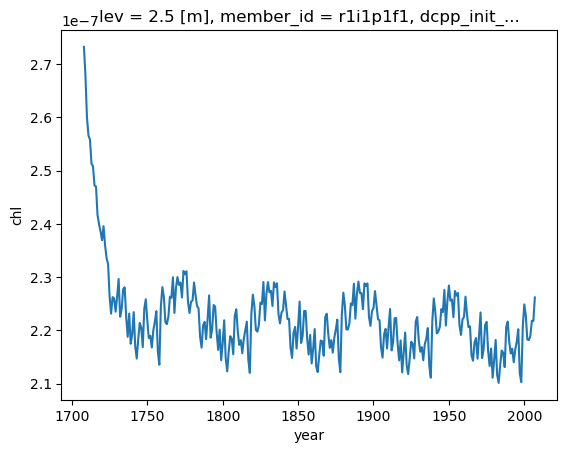

In [ ]:
for var in vol_data.data_vars.values():
    try:
        ((var.isel(lev=0) * volumes).sum(dim=['lat', 'lon']) / total_volume).groupby('time.year').mean().plot()
    
    except:
        ((var.isel(lev_partial=0) * volumes).sum(dim=['lat', 'lon']) / total_volume).groupby('time.year').mean().plot()
    
    plt.ylabel(var.name)
    plt.show()

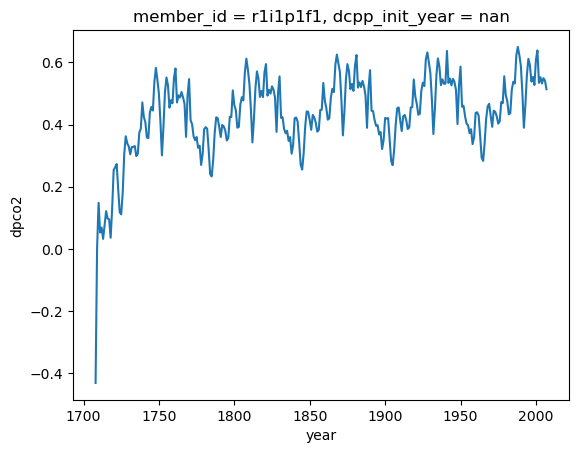

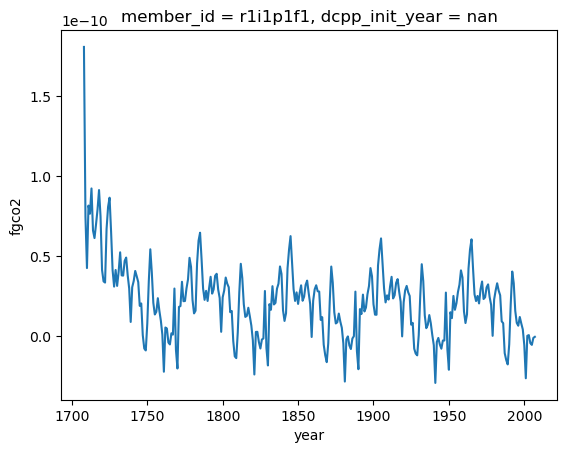

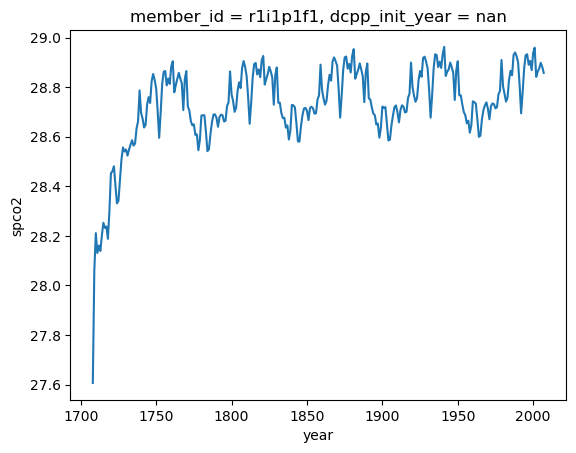

In [ ]:
for var in area_data.data_vars.values():
    try:
        ((var.groupby('time.year').mean() * areas).sum(dim=['lat', 'lon']) / total_area).plot()
    except:
        ((var.isel(lev_partial=0).groupby('time.year').mean() * areas).sum(dim=['lat', 'lon']) / total_area).plot()
    
    # plt.title(var.name)
    plt.ylabel(var.name)
    plt.show()

In [ ]:
for var in norm_data.data_vars.values():
    var.mean(dim=('lat','lon')).groupby('time.year').mean().plot()
    
    plt.ylabel(var.name)
    plt.show()